In [15]:

import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
import random
import json
from sklearn.model_selection import train_test_split
  

In [16]:
def load_jsonl(filename):
    with open(filename, "r") as f:
        return [json.loads(l.strip("\n")) for l in f.readlines()]



In [17]:
# load images
# response = load_jsonl('./experiment_res/one_option_five_images_five_response_13b.jsonl')
response = pd.read_csv('./experiment_res/data_repeat_5times.csv')
response = response[['option', 'interval_sample_images']].drop_duplicates()
response.rename(columns={"interval_sample_images":"image_paths"}, inplace=True)
response.head(1)

,option,image_paths
0,a bedroom is filled with lots of posters and a busy computer desk,"['./playground/data/css_data/unlabeled2017/000000385520.jpg', './playground/data/css_data/unlabeled2017/000000324197.jpg', './playground/data/css_data/unlabeled2017/000000487960.jpg', './playground/data/css_data/unlabeled2017/000000195603.jpg', './playground/data/css_data/unlabeled2017/000000383802.jpg']"


In [27]:

data_round1 = load_jsonl('./rank_res/generate_choice_rejected_tmp.jsonl')
data_round2 = load_jsonl('./rank_res/generate_choice_rejected_tmp_nontop10.jsonl')
data_round1 = pd.DataFrame(data_round1)
data_round2 = pd.DataFrame(data_round2)
data = pd.concat([data_round1, data_round2], axis=0)
data.drop_duplicates(inplace=True)
data = data[['question','option','rank_change', 'target_image_path']]

In [28]:
data

,question,option,rank_change,target_image_path
0,What color is the tennis racket handle in this particular picture?,a woman playing tennis with the ball in mid-air in front of her and the racket raised with her arm across her body in front of a sponsored grandstand,1,./playground/data/css_data/unlabeled2017/000000076113.jpg
1,Is the toilet in good condition or in poor condition?,a toilet sitting in the middle of an abandoned building,-13,./playground/data/css_data/unlabeled2017/000000296319.jpg
2,"Which picture shows the toilet situated in the corner of the room, and which picture shows it in the center?",a toilet sitting in the middle of an abandoned building,-5,./playground/data/css_data/unlabeled2017/000000296319.jpg
3,What is the size of the computer monitor in each picture?,a bedroom is filled with lots of posters and a busy computer desk,-7,./playground/data/css_data/unlabeled2017/000000185565.jpg
4,Which picture has the largest TV screen?,a bedroom is filled with lots of posters and a busy computer desk,-1,./playground/data/css_data/unlabeled2017/000000185565.jpg
...,...,...,...,...
2134,What color is the street sign in the foreground?,a close up of 2 street signs with buildings in the background,52,./playground/data/css_data/unlabeled2017/000000035852.jpg
2135,What is the color of the snowboard the man is riding?,a snowboarder is traveling down a snowy hill,-30,./playground/data/css_data/unlabeled2017/000000372532.jpg
2136,How many people are in the picture?,a snowboarder is traveling down a snowy hill,-4,./playground/data/css_data/unlabeled2017/000000372532.jpg
2137,In which picture is the giraffe standing at its tallest?,2 large giraffe's near a young giraffe being fed in a facility,3,./playground/data/css_data/unlabeled2017/000000154393.jpg


In [29]:
merged_data= pd.merge(data, response, how='left', on='option')

In [30]:
merged_data['data_label'] = merged_data['rank_change'].apply(lambda r: 'choice' if r >= 0 else 'rejected')

In [31]:
merged_data

,question,option,rank_change,target_image_path,image_paths,data_label
0,What color is the tennis racket handle in this particular picture?,a woman playing tennis with the ball in mid-air in front of her and the racket raised with her arm across her body in front of a sponsored grandstand,1,./playground/data/css_data/unlabeled2017/000000076113.jpg,"['./playground/data/css_data/unlabeled2017/000000181667.jpg', './playground/data/css_data/unlabeled2017/000000535119.jpg', './playground/data/css_data/unlabeled2017/000000131327.jpg', './playground/data/css_data/unlabeled2017/000000353345.jpg', './playground/data/css_data/unlabeled2017/000000180772.jpg']",choice
1,Is the toilet in good condition or in poor condition?,a toilet sitting in the middle of an abandoned building,-13,./playground/data/css_data/unlabeled2017/000000296319.jpg,"['./playground/data/css_data/unlabeled2017/000000533746.jpg', './playground/data/css_data/unlabeled2017/000000222980.jpg', './playground/data/css_data/unlabeled2017/000000470011.jpg', './playground/data/css_data/unlabeled2017/000000346485.jpg', './playground/data/css_data/unlabeled2017/000000380010.jpg']",rejected
2,"Which picture shows the toilet situated in the corner of the room, and which picture shows it in the center?",a toilet sitting in the middle of an abandoned building,-5,./playground/data/css_data/unlabeled2017/000000296319.jpg,"['./playground/data/css_data/unlabeled2017/000000533746.jpg', './playground/data/css_data/unlabeled2017/000000222980.jpg', './playground/data/css_data/unlabeled2017/000000470011.jpg', './playground/data/css_data/unlabeled2017/000000346485.jpg', './playground/data/css_data/unlabeled2017/000000380010.jpg']",rejected
3,What is the size of the computer monitor in each picture?,a bedroom is filled with lots of posters and a busy computer desk,-7,./playground/data/css_data/unlabeled2017/000000185565.jpg,"['./playground/data/css_data/unlabeled2017/000000385520.jpg', './playground/data/css_data/unlabeled2017/000000324197.jpg', './playground/data/css_data/unlabeled2017/000000487960.jpg', './playground/data/css_data/unlabeled2017/000000195603.jpg', './playground/data/css_data/unlabeled2017/000000383802.jpg']",rejected
4,Which picture has the largest TV screen?,a bedroom is filled with lots of posters and a busy computer desk,-1,./playground/data/css_data/unlabeled2017/000000185565.jpg,"['./playground/data/css_data/unlabeled2017/000000385520.jpg', './playground/data/css_data/unlabeled2017/000000324197.jpg', './playground/data/css_data/unlabeled2017/000000487960.jpg', './playground/data/css_data/unlabeled2017/000000195603.jpg', './playground/data/css_data/unlabeled2017/000000383802.jpg']",rejected
...,...,...,...,...,...,...
5665,What color is the street sign in the foreground?,a close up of 2 street signs with buildings in the background,52,./playground/data/css_data/unlabeled2017/000000035852.jpg,"['./playground/data/css_data/unlabeled2017/000000295181.jpg', './playground/data/css_data/unlabeled2017/000000297728.jpg', './playground/data/css_data/unlabeled2017/000000256277.jpg', './playground/data/css_data/unlabeled2017/000000495364.jpg', './playground/data/css_data/unlabeled2017/000000319044.jpg']",choice
5666,What is the color of the snowboard the man is riding?,a snowboarder is traveling down a snowy hill,-30,./playground/data/css_data/unlabeled2017/000000372532.jpg,"['./playground/data/css_data/unlabeled2017/000000174472.jpg', './playground/data/css_data/unlabeled2017/000000068365.jpg', './playground/data/css_data/unlabeled2017/000000309527.jpg', './playground/data/css_data/unlabeled2017/000000272038.jpg', './playground/data/css_data/unlabeled2017/000000478492.jpg']",rejected
5667,How many people are in the picture?,a snowboarder is traveling down a snowy hill,-4,./playground/data/css_data/unlabeled2017/000000372532.jpg,"['./playground/data/css_data/unlabeled2017/000000174472.jpg', './playground/data/css_data/unlabeled2017/000000068365.jpg', './playground/data/css_data/unlab

In [32]:
def transform_data(df):

    # Filter rows by rank_change strategy
    max_positive = df[df['rank_change'] >= 0].nlargest(1, 'rank_change')
    # random_negative = df[df['rank_change'] < 0].sample(1, random_state=42)
    
    # Check if there are any rows with negative rank_change before sampling
    if not df[df['rank_change'] < 0].empty:
        random_negative = df[df['rank_change'] < 0].sample(1, random_state=42)
    else:
        random_negative = pd.DataFrame()

    # Concatenate the filtered rows
    filtered_df = pd.concat([max_positive, random_negative])

    # Creating separate columns for 'choice' and 'rejected' questions
    filtered_df['choice'] = filtered_df.apply(lambda x: x['question'] if x['data_label'] == 'choice' else None, axis=1)
    filtered_df['rejected'] = filtered_df.apply(lambda x: x['question'] if x['data_label'] == 'rejected' else None, axis=1)

    # Grouping data by 'option' and aggregating lists
    output = filtered_df.groupby(['option','image_paths']).agg({
        'rank_change': list,
        'choice': lambda x: next(iter(x.dropna()), ''), #'first',
        'rejected': lambda x: next(iter(x.dropna()), ''),# lambda x: list(filter(None, x)),
        # 'rank_change': list
    }).reset_index()
    
    # Filter out entries where 'rejected' is empty
    output = output[output['choice'].map(bool)]
    
    output.rename(columns={'choice':'choose'}, inplace=True)
    # print(output)
    output_dict = output.to_dict('records')  # Convert DataFrame directly to list of dicts

    return output_dict


In [33]:
import matplotlib.pyplot as plt
from PIL import Image
def show_image(image_paths, sentence=None):

    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))  
    axs = axs.flatten()  


    for ax, img_path in zip(axs, image_paths):
        try:
            img = Image.open(img_path)
            ax.imshow(img)
            ax.axis('off')  
            ax.set_title(img_path.split('/')[-1]) 
        except FileNotFoundError:
            ax.imshow(np.zeros((10, 10, 3), dtype=int)) 
            ax.axis('off')
            ax.set_title('File Not Found')
    if sentence:
        fig.suptitle(sentence, fontsize=16)
    plt.tight_layout()
    plt.show()


In [34]:
train_raw_data = []
error = []
for name, group in merged_data.groupby('option'):    
    json_str = transform_data(group)
    if len(json_str)>0:
        json_res = json_str[0]
        tmp_res = {'option': json_res['option'],
         'image_paths': eval(json_res['image_paths']),
         'rank_change': json_res['rank_change'],
         'choose': json_res['choose'],
         'rejected': json_res['rejected']}
        train_raw_data.append(tmp_res)

In [35]:
train_raw_data[:2]

[{'option': '2 adult and 2 young giraffes look to the left of the view screen while walking along an enclosed area',
  'image_paths': ['./playground/data/css_data/unlabeled2017/000000544986.jpg',
   './playground/data/css_data/unlabeled2017/000000578452.jpg',
   './playground/data/css_data/unlabeled2017/000000239753.jpg',
   './playground/data/css_data/unlabeled2017/000000396989.jpg',
   './playground/data/css_data/unlabeled2017/000000158213.jpg'],
  'rank_change': [4, -6],
  'choose': 'In which picture is the giraffe walking closer to the fence?',
  'rejected': 'What is the color of the spots on the giraffes in this picture?'},
 {'option': '2 adult elephants playing with a younger elephant in a field',
  'image_paths': ['./playground/data/css_data/unlabeled2017/000000380461.jpg',
   './playground/data/css_data/unlabeled2017/000000379793.jpg',
   './playground/data/css_data/unlabeled2017/000000490781.jpg',
   './playground/data/css_data/unlabeled2017/000000156929.jpg',
   './playground

In [40]:

trainset, testset = train_test_split(train_raw_data, test_size=0.1, random_state=42)
print('the size of trainset is ', len(trainset))
print('the size of testset is ', len(testset))
with open('./playground/data/css_data/dpo_train_dataset.json', 'w') as f:
    json.dump(trainset, f,indent=4)
    
with open('./playground/data/css_data/dpo_test_dataset.json', 'w') as f:
    json.dump(testset, f, indent=4)

the size of trainset is  1044
the size of testset is  116


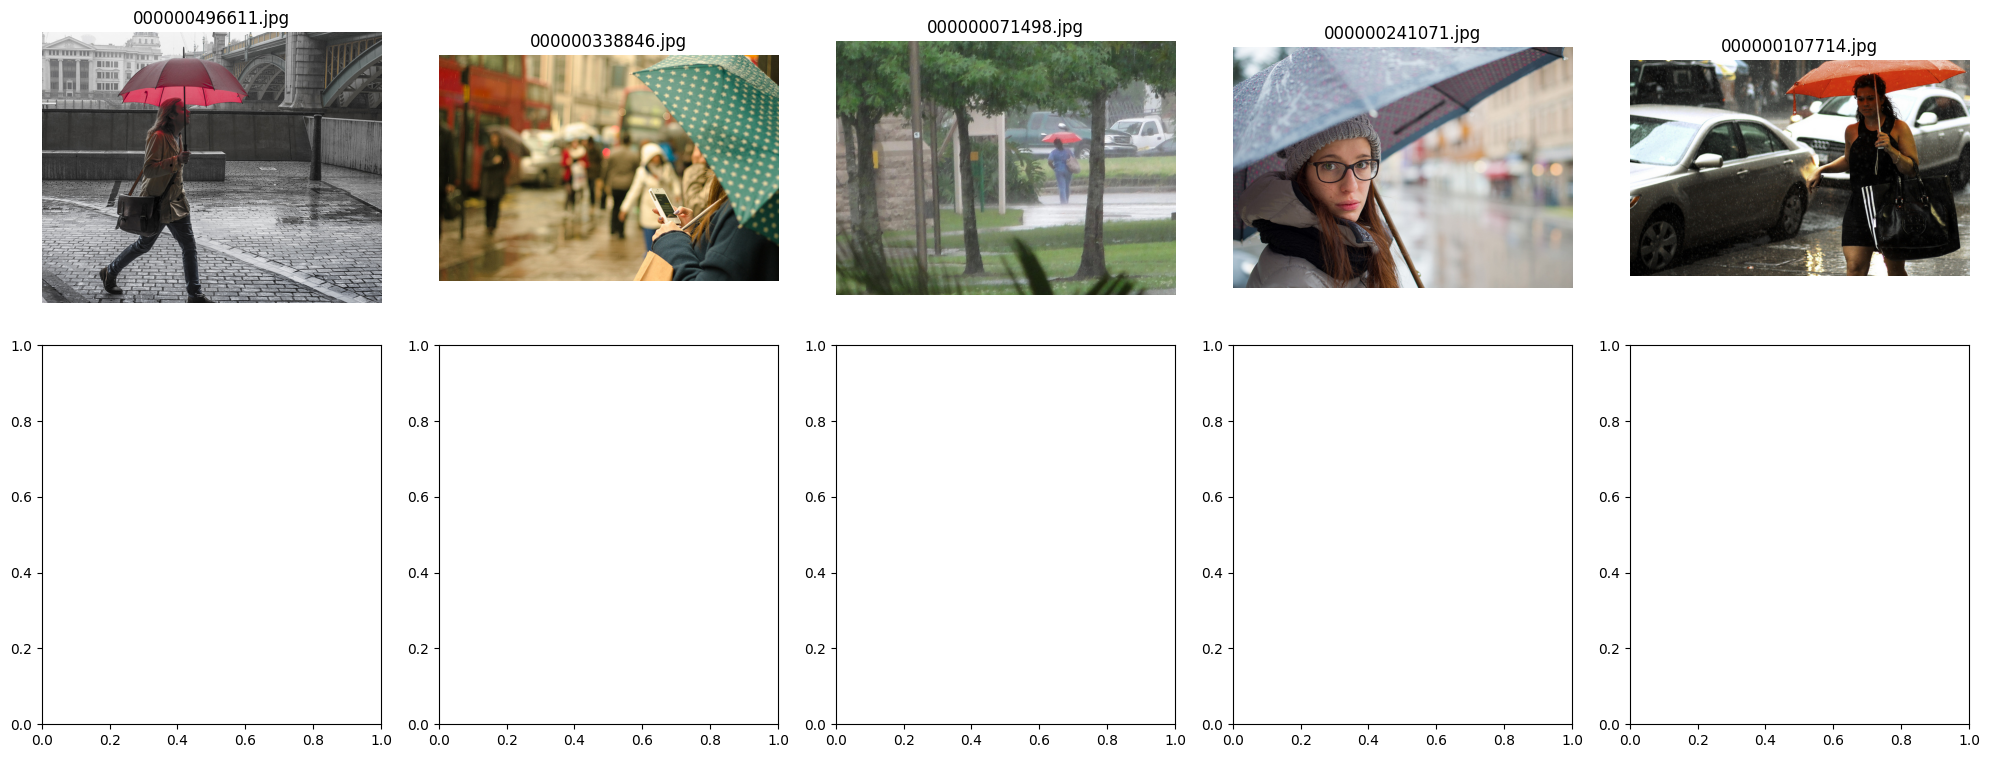

In [41]:
show_image([ "./playground/data/css_data/unlabeled2017/000000496611.jpg",
            "./playground/data/css_data/unlabeled2017/000000338846.jpg",
            "./playground/data/css_data/unlabeled2017/000000071498.jpg",
            "./playground/data/css_data/unlabeled2017/000000241071.jpg",
            "./playground/data/css_data/unlabeled2017/000000107714.jpg"])

In [14]:
len(trainset)

657